<a href="https://colab.research.google.com/github/iwanradjasa/Deteksi-Gambar-Kertas-Batu-Gunting/blob/main/Deteksi_Gambar_Kertas_Batu_Gunting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
....
Halo selamat malam kak, perkenalkan saya Iwan.
....
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
print(tf.__version__)

2.5.0


In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-06-26 14:58:17--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  4.72MB/s    in 55s     

2021-06-26 14:59:13 (5.57 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:

import os, zipfile
localdir = '/tmp/rockpaperscissors.zip'
zip_extract = zipfile.ZipFile(localdir, 'r')
zip_extract.extractall('/tmp')
zip_extract.close()

os.listdir('/tmp')

['rockpaperscissors.zip',
 'initgoogle_syslog_dir.0',
 'debugger_rwy6f2wng',
 '__pycache__',
 'dap_multiplexer.c1922f694fb1.root.log.INFO.20210626-143150.56',
 '__MACOSX',
 'tmpr0vtgkv2.py',
 'rockpaperscissors',
 'dap_multiplexer.INFO',
 'tmp9tp7pl44.py']

In [ ]:
pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio("/tmp/rockpaperscissors/rps-cv-images", output="/tmp/rockpaperscissors/data", seed=1337, ratio=(.6,.4))
output_data = '/tmp/rockpaperscissors/data'

train_data = os.path.join(output_data, 'train')
test_data = os.path.join(output_data, 'val')

Copying files: 2188 files [00:00, 4725.30 files/s]


In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    zoom_range = 0.2,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    validation_split = 0.4,
    shear_range = 0.2,
    fill_mode = 'nearest'
)
test_datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.4)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size = (255, 255),
    class_mode = 'categorical',
    batch_size = 32)

test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size = (255, 255),
    class_mode = 'categorical',
    batch_size = 32)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(255, 255, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(
    optimizer = tf.optimizers.Adam(learning_rate=0.001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [ ]:
model = model.fit(
    train_generator,
    validation_data = test_generator,
    validation_steps = 5,
    steps_per_epoch = 25,
    epochs = 10,
    verbose = 2)

Epoch 1/10
25/25 - 112s - loss: 0.3704 - accuracy: 0.8537 - val_loss: 0.2182 - val_accuracy: 0.9438
Epoch 2/10
25/25 - 112s - loss: 0.3872 - accuracy: 0.8562 - val_loss: 0.2133 - val_accuracy: 0.9354
Epoch 3/10
25/25 - 112s - loss: 0.3113 - accuracy: 0.8913 - val_loss: 0.1426 - val_accuracy: 0.9667
Epoch 4/10
25/25 - 112s - loss: 0.2306 - accuracy: 0.9325 - val_loss: 0.1068 - val_accuracy: 0.9688
Epoch 5/10
25/25 - 112s - loss: 0.1555 - accuracy: 0.9450 - val_loss: 0.1936 - val_accuracy: 0.9417
Epoch 6/10
25/25 - 112s - loss: 0.1415 - accuracy: 0.9563 - val_loss: 0.0653 - val_accuracy: 0.9792
Epoch 7/10
25/25 - 112s - loss: 0.1457 - accuracy: 0.9475 - val_loss: 0.0471 - val_accuracy: 0.9792
Epoch 8/10
25/25 - 112s - loss: 0.1813 - accuracy: 0.9350 - val_loss: 0.1266 - val_accuracy: 0.9604
Epoch 9/10
25/25 - 112s - loss: 0.1221 - accuracy: 0.9525 - val_loss: 0.0508 - val_accuracy: 0.9875
Epoch 10/10
25/25 - 112s - loss: 0.1102 - accuracy: 0.9613 - val_loss: 0.0708 - val_accuracy: 0.9812

Saving paper.jpg to paper.jpg
paper.jpg
paper


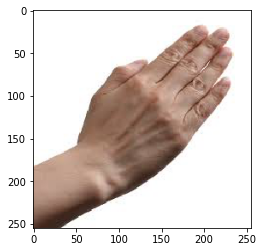

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(255,255))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=5)
  prediction = np.argmax(classes)

  print(fn)
  if prediction==0 :
    print('paper')
  elif prediction==1 :
    print('rock')
  else :
    print('scissors')